<a href="https://colab.research.google.com/github/SantiAp11/analisis-cobertura-salud-colombia/blob/main/analisis_cobertura_salud_colombia_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de cobertura institucional en salud en Colombia (2025)

Este proyecto analiza la distribución de IPS habilitadas en Colombia y su relación con la población departamental proyectada para 2025. El objetivo es identificar brechas de cobertura y aportar información útil para la toma de decisiones en salud pública.


## Paso 1: Carga del dataset de IPS

Se cargó el dataset oficial de las Instituciones Prestadoras de Salud (IPS) en Colombia, correspondiente al corte de junio de 2025. Este contiene información como ubicación, nombre del prestador, nivel de complejidad y habilitación.


In [107]:
import pandas as pd

df_ips = pd.read_csv('/content/Listado_de_IPS_en_Colombia_seg_n_su_nivel_de_complejidad.csv')
df.head()



,departamento,total_ips,poblacion_2025,ips_por_100mil_habitantes
0,CUNDINAMARCA,2073,11595305,17.88
1,ANTIOQUIA,994,6951825,14.30
2,VALLE DEL CAUCA,941,4652512,20.23
3,ATLÁNTICO,864,2845169,30.37
4,SANTANDER,706,2393214,29.50


## Paso 2: Exploración inicial y corrección de nombres de columnas

En este paso se explora la estructura del dataset para revisar la cantidad de registros, columnas y tipos de datos.  
También se corrige un problema común de codificación en archivos CSV exportados desde sistemas oficiales: la columna `ï»¿depa_nombre`, que corresponde a `depa_nombre`.

Este paso es importante para asegurar que el análisis posterior sea limpio y coherente.


In [108]:
# Revisar estructura general del dataset
df_ips.info()

# Verificar los nombres exactos de las columnas
df_ips.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   depa_nombre            11466 non-null  object 
 1   muni_nombre            11466 non-null  object 
 2   codigo_habilitacion    11466 non-null  int64  
 3   nombre_prestador       11466 non-null  object 
 4   tido_codigo            0 non-null      float64
 5   nits_nit               11466 non-null  int64  
 6   razon_social           11466 non-null  object 
 7   clpr_codigo            11466 non-null  int64  
 8   clpr_nombre            11466 non-null  object 
 9   ese                    3501 non-null   object 
 10  direccion              11466 non-null  object 
 11  telefono               11453 non-null  object 
 12  fax                    4727 non-null   object 
 13  email                  11452 non-null  object 
 14  gerente                0 non-null      float64
 15  ni

Index(['depa_nombre', 'muni_nombre', 'codigo_habilitacion', 'nombre_prestador',
       'tido_codigo', 'nits_nit', 'razon_social', 'clpr_codigo', 'clpr_nombre',
       'ese', 'direccion', 'telefono', 'fax', 'email', 'gerente', 'nivel',
       'caracter', 'habilitado', 'fecha_radicacion', 'fecha_vencimiento',
       'fecha_cierre', 'dv', 'clase_persona', 'naju_codigo', 'naju_nombre',
       'numero_sede_principal', 'fecha_corte_REPS'],
      dtype='object')

## Paso 3: Renombramiento de columna con error de codificación

Se corrige la columna `ï»¿depa_nombre`, afectada por un error de codificación al exportar el archivo en formato CSV. Esta columna representa el nombre del departamento, por lo que es fundamental para el análisis.

Este tipo de errores suelen ocurrir por el uso de codificación UTF-8 con BOM (Byte Order Mark), y deben corregirse para evitar errores posteriores.


In [109]:
# Renombrar columna mal codificada
df_ips.rename(columns={'ï»¿depa_nombre': 'depa_nombre'}, inplace=True)

# Confirmar el cambio
df_ips.columns


Index(['depa_nombre', 'muni_nombre', 'codigo_habilitacion', 'nombre_prestador',
       'tido_codigo', 'nits_nit', 'razon_social', 'clpr_codigo', 'clpr_nombre',
       'ese', 'direccion', 'telefono', 'fax', 'email', 'gerente', 'nivel',
       'caracter', 'habilitado', 'fecha_radicacion', 'fecha_vencimiento',
       'fecha_cierre', 'dv', 'clase_persona', 'naju_codigo', 'naju_nombre',
       'numero_sede_principal', 'fecha_corte_REPS'],
      dtype='object')

## Paso 4: Selección de columnas clave para el análisis

Se seleccionan únicamente las columnas necesarias para el análisis de cobertura institucional. Esto permite enfocar el trabajo y reducir el tamaño del dataset.  
Las columnas elegidas reflejan ubicación, nombre del prestador, nivel de atención, tipo de institución, naturaleza jurídica y estado de habilitación.


In [110]:
# Seleccionar columnas relevantes
columnas_clave = [
    'depa_nombre',
    'muni_nombre',
    'nombre_prestador',
    'nivel',
    'clpr_nombre',
    'caracter',
    'habilitado'
]

df_ips_filtrado = df_ips[columnas_clave]

# Mostrar las primeras filas del dataset filtrado
df_ips_filtrado.head()


,depa_nombre,muni_nombre,nombre_prestador,nivel,clpr_nombre,caracter,habilitado
0,Amazonas,LETICIA,E.S.E. HOSPITAL SAN RAFAEL DE LETICIA,2.0,Instituciones - IPS,DEPARTAMENTAL,SI
1,Amazonas,LETICIA,FREYA SKIN AND BODY CARE S.A.S TWO,NaN,Instituciones - IPS,NaN,SI
2,Amazonas,LETICIA,FUNDACION CLINICA LETICIA,NaN,Instituciones - IPS,NaN,SI
3,Amazonas,LETICIA,IMPROVE QUALITY REDUCE COST SAVE LIFES AUDITOR...,NaN,Instituciones - IPS,NaN,SI
4,Amazonas,LETICIA,"INSTITUTO PARA LA PREVENCIÓN, EL TRATAMIENTO Y...",NaN,Instituciones - IPS,NaN,SI


## Paso 5: Limpieza de valores nulos y estandarización

Se realiza la limpieza de valores nulos en las columnas `nivel` y `caracter`, que son claves para identificar la cobertura y naturaleza de las IPS.  
También se estandarizan los datos para asegurar consistencia en el análisis posterior.

- Los valores nulos en `nivel` se reemplazan por 0 (sin nivel definido).
- Los valores nulos en `caracter` se reemplazan por "Sin información".
- Se revisan los valores únicos de `habilitado` para confirmar consistencia.


In [111]:
# Reemplazar nulos en nivel con 0 y convertir a entero
df_ips_filtrado.loc[:, 'nivel'] = df_ips_filtrado['nivel'].fillna(0).astype(int)

# Reemplazar nulos en caracter con "Sin información"
df_ips_filtrado.loc[:, 'caracter'] = df_ips_filtrado['caracter'].fillna('Sin información')

# Verificar valores únicos de habilitado
df_ips_filtrado['habilitado'].value_counts()


,count
habilitado,
SI,11466


## Paso 6: Análisis exploratorio — IPS por departamento

Se realiza un conteo de IPS habilitadas por departamento (`depa_nombre`), como primer paso para entender la distribución territorial de la oferta institucional en salud.  
Esto permitirá más adelante cruzar con la población departamental y evaluar la cobertura relativa.


In [112]:
# Conteo de IPS por departamento
ips_por_departamento = df_ips_filtrado['depa_nombre'].value_counts().sort_values(ascending=False)

# Mostrar los 10 departamentos con más IPS
ips_por_departamento.head(10)


,count
depa_nombre,
Bogotá D.C,1616
Antioquia,994
Valle del cauca,874
Santander,706
Barranquilla,576
Córdoba,461
Cundinamarca,457
Cesar,418
Cartagena,418


## Paso 7: Corrección de errores de codificación en los nombres de departamento

Al cargar el archivo, se detectaron errores de codificación en algunos nombres de departamento, como:

- "BogotÃ¡ D.C" → "Bogotá D.C"
- "CÃ³rdoba" → "Córdoba"
- "Valle del cauca" → "Valle del Cauca"

Corregimos estos nombres para asegurar consistencia en los análisis posteriores.


In [113]:
# Corrección de errores de codificación
df_ips_filtrado['depa_nombre'] = df_ips_filtrado['depa_nombre'].replace({
    'BogotÃ¡ D.C': 'Bogotá D.C',
    'CÃ³rdoba': 'Córdoba',
    'Valle del cauca': 'Valle del Cauca',
    'Tolima ': 'Tolima'
})

# Verificar los nombres únicos corregidos
df_ips_filtrado['depa_nombre'].unique()


/tmp/ipython-input-113-2041474477.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Barranquilla',
       'Bogotá D.C', 'Bolívar', 'Boyacá', 'Buenaventura', 'Caldas',
       'Caquetá', 'Cartagena', 'Casanare', 'Cauca', 'Cesar', 'Chocó',
       'Córdoba', 'Cundinamarca', 'Guainía', 'Guaviare', 'Huila',
       'La Guajira', 'Magdalena', 'Meta', 'Nariño', 'Norte de Santander',
       'Putumayo', 'Quindío', 'Risaralda', 'San Andrés y Providencia',
       'Santa Marta', 'Santander', 'Sucre', 'Tolima', 'Valle del Cauca',
       'Vaupés', 'Vichada'], dtype=object)

## Paso 7 (continuación): Corrección completa de errores de codificación

Además de los errores corregidos anteriormente, se identificaron otros nombres mal codificados.  
Se actualiza la columna `depa_nombre` para asegurar que todos los nombres de departamento estén escritos correctamente.


In [114]:
# Corrección completa de errores de codificación
df_ips_filtrado.loc[:, 'depa_nombre'] = df_ips_filtrado['depa_nombre'].replace({
    'BogotÃ¡ D.C': 'Bogotá D.C',
    'CÃ³rdoba': 'Córdoba',
    'AtlÃ¡ntico': 'Atlántico',
    'BolÃ\xadvar': 'Bolívar',
    'BoyacÃ¡': 'Boyacá',
    'CaquetÃ¡': 'Caquetá',
    'ChocÃ³': 'Chocó',
    'GuainÃ\xada': 'Guainía',
    'NariÃ±o': 'Nariño',
    'QuindÃ\xado': 'Quindío',
    'San AndrÃ©s y Providencia': 'San Andrés y Providencia',
    'VaupÃ©s': 'Vaupés'
})

# Verificación final de los valores únicos corregidos
df_ips_filtrado['depa_nombre'].unique()


array(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Barranquilla',
       'Bogotá D.C', 'Bolívar', 'Boyacá', 'Buenaventura', 'Caldas',
       'Caquetá', 'Cartagena', 'Casanare', 'Cauca', 'Cesar', 'Chocó',
       'Córdoba', 'Cundinamarca', 'Guainía', 'Guaviare', 'Huila',
       'La Guajira', 'Magdalena', 'Meta', 'Nariño', 'Norte de Santander',
       'Putumayo', 'Quindío', 'Risaralda', 'San Andrés y Providencia',
       'Santa Marta', 'Santander', 'Sucre', 'Tolima', 'Valle del Cauca',
       'Vaupés', 'Vichada'], dtype=object)

## Paso 7 (finalizado): Nombres de departamento estandarizados

Después de identificar y corregir errores de codificación, ahora la columna `depa_nombre` contiene nombres válidos y legibles para todos los departamentos de Colombia.  
Esto asegura la consistencia del análisis posterior, especialmente al agrupar, contar y cruzar con datos de población.

Ejemplos de correcciones aplicadas:
- "BogotÃ¡ D.C" → "Bogotá D.C"
- "CÃ³rdoba" → "Córdoba"
- "AtlÃ¡ntico" → "Atlántico"
- "BolÃ\xadvar" → "Bolívar"
- ...

Ahora el análisis puede continuar sin ambigüedades en los nombres de las regiones.


## Paso 8: Verificación de duplicidad entre distritos especiales y departamentos

Algunas ciudades tienen un estatus especial como distrito y aparecen como si fueran departamentos independientes en el dataset.  
Ejemplos: Bogotá D.C, Barranquilla, Cartagena, Santa Marta, Buenaventura.

Verificamos si también están listadas IPS en los departamentos a los que pertenecen, para evitar duplicidad cuando se unan con datos poblacionales.


In [115]:
# Lista de distritos especiales y su departamento correspondiente
distritos = {
    'Bogotá D.C': 'Cundinamarca',
    'Barranquilla': 'Atlántico',
    'Cartagena': 'Bolívar',
    'Santa Marta': 'Magdalena',
    'Buenaventura': 'Valle del Cauca'
}

# Contar IPS en cada distrito y su departamento relacionado
for distrito, departamento in distritos.items():
    distrito_count = df_ips_filtrado[df_ips_filtrado['depa_nombre'] == distrito].shape[0]
    depto_count = df_ips_filtrado[df_ips_filtrado['depa_nombre'] == departamento].shape[0]
    print(f"{distrito} → {distrito_count} IPS")
    print(f"{departamento} (departamento relacionado) → {depto_count} IPS\n")


Bogotá D.C → 1616 IPS
Cundinamarca (departamento relacionado) → 457 IPS

Barranquilla → 576 IPS
Atlántico (departamento relacionado) → 288 IPS

Cartagena → 418 IPS
Bolívar (departamento relacionado) → 181 IPS

Santa Marta → 265 IPS
Magdalena (departamento relacionado) → 150 IPS

Buenaventura → 67 IPS
Valle del Cauca (departamento relacionado) → 874 IPS



## Paso 9: Justificación y unificación de distritos especiales

Tras verificar los conteos de IPS por distrito y su departamento correspondiente, se concluye que **no hay duplicidad** de registros entre ellos, ya que el número de registros en el disstrito es mayor que el número de registros en el departamento.

Esto significa que, al unificarlos, simplemente estamos sumando los datos correctamente.

Por tanto, se reemplazarán los nombres de los distritos por su departamento correspondiente:

- Bogotá D.C → Cundinamarca  
- Barranquilla → Atlántico  
- Cartagena → Bolívar  
- Santa Marta → Magdalena  
- Buenaventura → Valle del Cauca


In [116]:
# Unificación de distritos a departamentos
df_ips_filtrado.loc[:, 'depa_nombre'] = df_ips_filtrado['depa_nombre'].replace({
    'Bogotá D.C': 'Cundinamarca',
    'Barranquilla': 'Atlántico',
    'Cartagena': 'Bolívar',
    'Santa Marta': 'Magdalena',
    'Buenaventura': 'Valle del Cauca'
})

# Verificar que ya no aparezcan los distritos como nombres únicos
sorted(df_ips_filtrado['depa_nombre'].unique())


['Amazonas',
 'Antioquia',
 'Arauca',
 'Atlántico',
 'Bolívar',
 'Boyacá',
 'Caldas',
 'Caquetá',
 'Casanare',
 'Cauca',
 'Cesar',
 'Chocó',
 'Cundinamarca',
 'Córdoba',
 'Guainía',
 'Guaviare',
 'Huila',
 'La Guajira',
 'Magdalena',
 'Meta',
 'Nariño',
 'Norte de Santander',
 'Putumayo',
 'Quindío',
 'Risaralda',
 'San Andrés y Providencia',
 'Santander',
 'Sucre',
 'Tolima',
 'Valle del Cauca',
 'Vaupés',
 'Vichada']

## Paso 10: Conteo total de IPS por departamento

Con los nombres de los departamentos estandarizados, ahora agrupamos el número total de IPS habilitadas por cada uno. Esta tabla será clave para calcular la cobertura frente a la población en pasos posteriores.


In [117]:
# Contar número de IPS por departamento
ips_por_departamento = df_ips_filtrado['depa_nombre'].value_counts().reset_index()

# Renombrar columnas
ips_por_departamento.columns = ['departamento', 'total_ips']

# Mostrar la tabla
ips_por_departamento.sort_values(by='total_ips', ascending=False).reset_index(drop=True)


,departamento,total_ips
0,Cundinamarca,2073
1,Antioquia,994
2,Valle del Cauca,941
3,Atlántico,864
4,Santander,706
5,Bolívar,599
6,Córdoba,461
7,Cesar,418
8,Magdalena,415
9,Tolima,384


## Paso 11: Guardar el total de IPS por departamento

Guardamos la tabla generada con el total de IPS por departamento, ya con los nombres estandarizados, para usarla más adelante al calcular la cobertura en relación con la población.


In [118]:
# Guardar la tabla como CSV
ips_por_departamento.to_csv('ips_por_departamento_2025.csv', index=False)


## Paso 12: Carga de la población departamental proyectada (2025) desde Wikipedia

Utilizamos `pandas.read_html` para hacer scraping de la tabla de población por departamento publicada en Wikipedia, basada en estimaciones del DANE para el año 2025.


In [119]:
import pandas as pd

# URL Enlace Wikipedia
url = "https://es.wikipedia.org/wiki/Anexo:Departamentos_de_Colombia_por_poblaci%C3%B3n"

# Leer todas las tablas de la página
tablas = pd.read_html(url, header=0)

# Ver cuántas tablas hay
print(f"Se encontraron {len(tablas)} tablas")

# Mostrar las primeras filas de la primera tabla
tablas[0].head()


Se encontraron 2 tablas


,N.º,N.º.1,Departamento,Población,Población.1,Contribución (%),Contribución (%).1,Variación 2018-2025,Variación 2018-2025.1,Variación 2018-2025.2,Comparable
0,2025,2018,Departamento,2025,2018,2025,2018,%,Prom.,Abs.,Comparable
1,1,1,Bogotá,7 937 898,7 412 566,14.95%,15.36%,+7.09%,+0.98%,525 332,Laos
2,2,2,Antioquia,6 951 825,6 407 102,13.09%,13.28%,+8.5%,+1.17%,544 723,Nicaragua
3,3,3,Valle del Cauca,4 652 512,4 475 886,8.76%,9.27%,+3.95%,+0.55%,176 626,Panamá
4,4,4,Cundinamarca,3 657 407,2 919 060,6.89%,6.05%,+25.29%,+3.27%,738 347,Georgia


### Paso 12.1: Carga del dataset de población por departamento (2025)

Se extrajo una tabla desde Wikipedia que contiene la población proyectada para cada departamento de Colombia en el año 2025. Esta información permitirá calcular el número de IPS por cada 100.000 habitantes y detectar posibles brechas de cobertura en salud pública.


In [120]:
import pandas as pd

# URL de la página
url = "https://es.wikipedia.org/wiki/Anexo:Departamentos_de_Colombia_por_poblaci%C3%B3n"

# Leer todas las tablas sin especificar header
tablas = pd.read_html(url)

# Revisar cuántas tablas hay
print(f"Se encontraron {len(tablas)} tablas.")

# Ver la primera fila de cada tabla para identificar la correcta
for i, tabla in enumerate(tablas):
    print(f"\nTabla {i}:\n", tabla.head(3))


Se encontraron 2 tablas.

Tabla 0:
    N.º          Departamento  Población            Contribución (%)          \
  2025 2018     Departamento       2025       2018             2025    2018   
0    1    1           Bogotá  7 937 898  7 412 566           14.95%  15.36%   
1    2    2        Antioquia  6 951 825  6 407 102           13.09%  13.28%   
2    3    3  Valle del Cauca  4 652 512  4 475 886            8.76%   9.27%   

  Variación 2018-2025                  Comparable  
                    %   Prom.     Abs. Comparable  
0              +7.09%  +0.98%  525 332       Laos  
1               +8.5%  +1.17%  544 723  Nicaragua  
2              +3.95%  +0.55%  176 626     Panamá  

Tabla 1:
                         0                                     1
0  Control de autoridades  Proyectos Wikimedia  Datos: Q6567521


### Paso 12.2: Visualización de la tabla de población (sin procesar)

Se selecciona la tabla 0 extraída desde Wikipedia, correspondiente a las proyecciones de población por departamento en 2025. A continuación se visualizan sus primeras filas para entender su estructura antes de realizar la limpieza.


In [121]:
# Seleccionar la tabla 0 (proyecciones de población)
tabla_poblacion = tablas[0]

# Mostrar la estructura y primeras filas
tabla_poblacion.info()
tabla_poblacion.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   (N.º, 2025)                   34 non-null     object
 1   (N.º, 2018)                   34 non-null     object
 2   (Departamento, Departamento)  34 non-null     object
 3   (Población, 2025)             34 non-null     object
 4   (Población, 2018)             34 non-null     object
 5   (Contribución (%), 2025)      34 non-null     object
 6   (Contribución (%), 2018)      34 non-null     object
 7   (Variación 2018-2025, %)      34 non-null     object
 8   (Variación 2018-2025, Prom.)  34 non-null     object
 9   (Variación 2018-2025, Abs.)   34 non-null     object
 10  (Comparable, Comparable)      34 non-null     object
dtypes: object(11)
memory usage: 3.1+ KB


N.º          Departamento  Población            Contribución (%)          \
  2025 2018     Departamento       2025       2018             2025    2018   
0    1    1           Bogotá  7 937 898  7 412 566           14.95%  15.36%   
1    2    2        Antioquia  6 951 825  6 407 102           13.09%  13.28%   
2    3    3  Valle del Cauca  4 652 512  4 475 886            8.76%   9.27%   
3    4    4     Cundinamarca  3 657 407  2 919 060            6.89%   6.05%   
4    5    5        Atlántico  2 845 169  2 535 517            5.36%   5.25%   

  Variación 2018-2025                          Comparable  
                    %   Prom.     Abs.         Comparable  
0              +7.09%  +0.98%  525 332               Laos  
1               +8.5%  +1.17%  544 723          Nicaragua  
2              +3.95%  +0.55%  176 626             Panamá  
3             +25.29%  +3.27%  738 347            Georgia  
4             +12.21%  +1.66%  309 652  Guinea Ecuatorial

### Paso 12.3: Limpieza inicial de la tabla de población

La tabla tiene encabezados multinivel que dificultan su manipulación. En este paso se renombran las columnas claves y se seleccionan solo las necesarias: nombre del departamento y población proyectada para 2025.


In [122]:
# Seleccionar solo las columnas necesarias con encabezados multinivel
df_poblacion = tabla_poblacion[[('Departamento', 'Departamento'), ('Población', '2025')]].copy()

# Renombrar columnas
df_poblacion.columns = ['departamento', 'poblacion_2025']

# Verificar resultado
df_poblacion.head()


,departamento,poblacion_2025
0,Bogotá,7 937 898
1,Antioquia,6 951 825
2,Valle del Cauca,4 652 512
3,Cundinamarca,3 657 407
4,Atlántico,2 845 169


### Paso 12.4: Limpieza de la columna de población

Se eliminan los espacios de los valores de población y se convierte la columna a tipo entero para poder hacer cálculos posteriores.


In [123]:
# Eliminar todos los tipos de espacios en blanco (incluye \xa0) y convertir a entero
df_poblacion['poblacion_2025'] = df_poblacion['poblacion_2025'].str.replace(r'\s+', '', regex=True).astype(int)

# Verificamos el resultado
df_poblacion.head()



,departamento,poblacion_2025
0,Bogotá,7937898
1,Antioquia,6951825
2,Valle del Cauca,4652512
3,Cundinamarca,3657407
4,Atlántico,2845169


### Paso 12.5: Unificación de Bogotá y Cundinamarca en población

Dado que Bogotá es un distrito especial que pertenece al territorio de Cundinamarca, para efectos de análisis territorial se decide agrupar su población con la del departamento. Se eliminó la fila de Bogotá y se sumó su población a Cundinamarca.


In [124]:
# Sumar la población de Bogotá a la de Cundinamarca
pob_bogota = df_poblacion.loc[df_poblacion['departamento'] == 'Bogotá', 'poblacion_2025'].values[0]
pob_cundinamarca = df_poblacion.loc[df_poblacion['departamento'] == 'Cundinamarca', 'poblacion_2025'].values[0]

# Actualizar la población de Cundinamarca
df_poblacion.loc[df_poblacion['departamento'] == 'Cundinamarca', 'poblacion_2025'] = pob_bogota + pob_cundinamarca

# Eliminar la fila de Bogotá
df_poblacion = df_poblacion[df_poblacion['departamento'] != 'Bogotá'].reset_index(drop=True)

# Verificar resultado
df_poblacion



,departamento,poblacion_2025
0,Antioquia,6951825
1,Valle del Cauca,4652512
2,Cundinamarca,11595305
3,Atlántico,2845169
4,Santander,2393214
5,Bolívar,2278770
6,Córdoba,1929336
7,Nariño,1719281
8,Norte de Santander,1717992
9,Cauca,1590171


## Paso 13: Cálculo de cobertura de IPS por cada 100.000 habitantes

Para evaluar la distribución de las IPS en Colombia de forma proporcional a la población, se calcula la cantidad de IPS por cada 100.000 habitantes en cada departamento.

Este indicador es útil para identificar brechas de cobertura entre territorios.


In [125]:
# Agrupar el número de IPS por departamento (ya está limpio)
ips_por_departamento = df_ips_filtrado['depa_nombre'].value_counts().reset_index()
ips_por_departamento.columns = ['departamento', 'total_ips']

# Unir con el dataframe de población
df_cobertura = pd.merge(ips_por_departamento, df_poblacion, on='departamento', how='inner')

# Calcular cobertura por cada 100.000 habitantes
df_cobertura['ips_por_100mil_habitantes'] = (df_cobertura['total_ips'] / df_cobertura['poblacion_2025']) * 100000

# Redondear
df_cobertura['ips_por_100mil_habitantes'] = df_cobertura['ips_por_100mil_habitantes'].round(2)

# Mostrar resultado
df_cobertura.sort_values(by='ips_por_100mil_habitantes', ascending=False)


,departamento,total_ips,poblacion_2025,ips_por_100mil_habitantes
26,San Andrés y Providencia,22,62181,35.38
12,Sucre,338,1016826,33.24
20,Quindío,178,568560,31.31
3,Atlántico,864,2845169,30.37
7,Cesar,418,1414859,29.54
4,Santander,706,2393214,29.50
10,Boyacá,371,1324122,28.02
22,Casanare,135,481938,28.01
9,Tolima,384,1386826,27.69
21,Chocó,167,615082,27.15


##Paso 14: Visualización de la cobertura de IPS por cada 100.000 habitantes

Se construyó un gráfico de barras para representar visualmente la cobertura institucional de salud por departamento en Colombia.  
El indicador utilizado es el número de **Instituciones Prestadoras de Salud (IPS) por cada 100.000 habitantes**, calculado con base en:

- El total de IPS habilitadas por departamento (datos oficiales REPS junio 2025).
- La proyección de población para el año 2025 (DANE, tomada de Wikipedia).

Esta visualización permite identificar de manera clara los departamentos con mayor y menor acceso institucional a servicios de salud, lo cual es útil para priorizar políticas públicas de fortalecimiento del sistema.


/tmp/ipython-input-126-1599307394.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




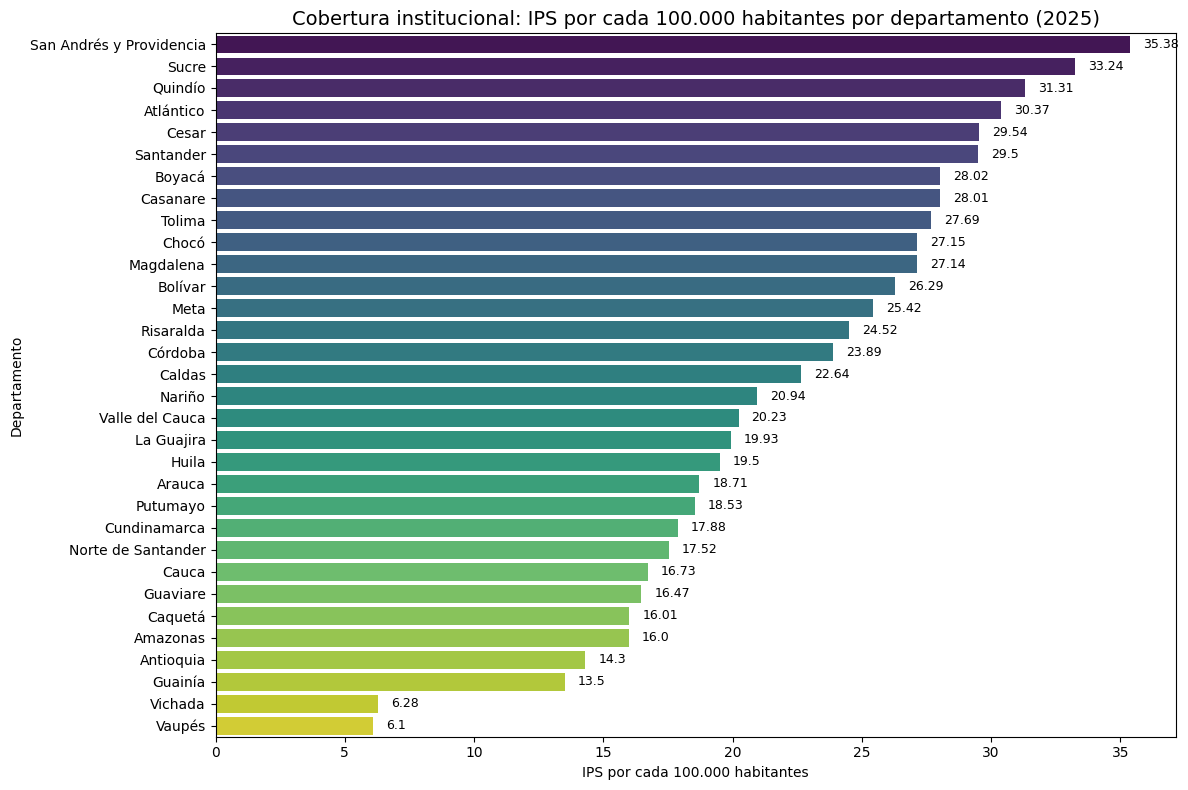

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar por cobertura descendente
df_plot = df_cobertura.sort_values(by='ips_por_100mil_habitantes', ascending=False)

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear gráfico de barras horizontales
sns.barplot(
    data=df_plot,
    x='ips_por_100mil_habitantes',
    y='departamento',
    palette='viridis'
)

# Agregar títulos y etiquetas
plt.title('Cobertura institucional: IPS por cada 100.000 habitantes por departamento (2025)', fontsize=14)
plt.xlabel('IPS por cada 100.000 habitantes')
plt.ylabel('Departamento')

# Mostrar los valores en cada barra
for i, v in enumerate(df_plot['ips_por_100mil_habitantes']):
    plt.text(v + 0.5, i, str(v), color='black', va='center', fontsize=9)

plt.tight_layout()
plt.show()


##Paso 15: Análisis e interpretación del gráfico

El gráfico de barras muestra el número de **IPS por cada 100.000 habitantes** en cada departamento colombiano. A partir de este análisis, se identifican:

### Departamentos con mayor cobertura:
- **San Andrés y Providencia (35.38)**
- **Sucre (33.24)**
- **Quindío (31.31)**
- **Atlántico (30.37)**
- **Cesar (29.54)**

Estos territorios, pese a tener poblaciones moderadas, cuentan con una buena densidad institucional, posiblemente por su distribución urbana concentrada.

### Departamentos con menor cobertura:
- **Vaupés (6.10)**
- **Vichada (6.28)**
- **Guainía (13.5)**
- **Antioquia (14)**
- **Amazonas (16)**


##Paso 16: Gráfico de dispersión – Población vs Cantidad de IPS

Este gráfico busca visualizar la relación entre el tamaño de la población departamental y la cantidad total de IPS habilitadas en 2025. Nos permitirá detectar si existe una correlación entre estas dos variables y si hay departamentos con desequilibrios significativos, ya sea por exceso o escasez de cobertura institucional en salud.

Por ejemplo, se espera que departamentos densamente poblados como Cundinamarca o Antioquia tengan más IPS, pero también es importante analizar si departamentos con menor población tienen una oferta institucional proporcional.

Se usará un gráfico de dispersión (`scatterplot`) con cada punto representando un departamento.


In [127]:
import plotly.express as px

# Crear gráfico de dispersión interactivo
fig = px.scatter(
    df_cobertura,
    x='poblacion_2025',
    y='total_ips',
    hover_name='departamento',
    hover_data={
        'poblacion_2025': True,
        'total_ips': True,
        'ips_por_100mil_habitantes': True
    },
    labels={
        'poblacion_2025': 'Población (2025)',
        'total_ips': 'Total de IPS'
    },
    title='Relación entre población y número de IPS por departamento (2025)',
    template='plotly_white'
)

# Ajustes visuales
fig.update_traces(textposition='top center', marker=dict(size=10, color='mediumseagreen'))
fig.update_layout(font=dict(size=12))

# Mostrar gráfico
fig.show()


## Paso 16.1: Mapa coroplético de cobertura institucional

En este paso se crea un mapa estableciendo un esquema de color por departamento, según el número de IPS por cada 100 000 habitantes. Este tipo de visualización ayuda a identificar desigualdades territoriales: departamentos con cobertura alta estarán en tonos más intensos, los que tienen baja cobertura en tonos tenues.

Se utilizará GeoJSON oficial de los límites departamentales de Colombia.


In [128]:
import requests

url_geo = "https://raw.githubusercontent.com/caticoa3/colombia_mapa/master/co_2018_MGN_DPTO_POLITICO.geojson"
response = requests.get(url_geo)

geo = response.json()

print("Status:", response.status_code)


Status: 200


In [129]:
# Verifica la primera feature del GeoJSON para revisar las claves
print(geo["features"][0]["properties"])



{'DPTO_CCDGO': '18', 'DPTO_CNMBR': 'CAQUETÁ', 'DPTO_NANO_': 1981, 'DPTO_CACTO': 'Ley 78 del 29 de Diciembre de 1981', 'DPTO_NANO': 2018, 'Shape_Leng': 21.3842867432, 'Shape_Area': 7.3184846917}


In [130]:
# Convertir a mayúsculas con tildes para que coincidan con el GeoJSON
df_cobertura['departamento'] = df_cobertura['departamento'].str.upper()



In [131]:
import plotly.express as px
import pandas as pd
import requests

# Asegúrate de tener df_cobertura ya listo y corregido

# Descargar el GeoJSON
url_geo = "https://raw.githubusercontent.com/caticoa3/colombia_mapa/master/co_2018_MGN_DPTO_POLITICO.geojson"
geo = requests.get(url_geo).json()

# Convertir nombres a mayúsculas
df_cobertura['departamento'] = df_cobertura['departamento'].str.upper()

# Crear el mapa
fig = px.choropleth(
    df_cobertura,
    geojson=geo,
    locations="departamento",
    featureidkey="properties.DPTO_CNMBR",  # Nombre correcto
    color="ips_por_100mil_habitantes",
    color_continuous_scale="Viridis",
    hover_name="departamento",
    hover_data={
        "ips_por_100mil_habitantes": True,
        "total_ips": True,
        "poblacion_2025": True
    },
    labels={"ips_por_100mil_habitantes": "IPS por 100 000 hab."},
    title="Cobertura institucional: IPS por cada 100 000 habitantes (2025)"
)

# Ajustes visuales
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0},
                  coloraxis_colorbar=dict(title="IPS/100k"))

# Mostrar
fig.show()



## Paso 17 Exportación de datos para Looker Studio

Para crear un dashboard interactivo en Looker Studio, se exportó la tabla final del análisis con la cobertura institucional por departamento en formato CSV. Este archivo se cargará desde Google Drive para su vinculación en la plataforma.


In [132]:
# Exportar tabla final como CSV para Looker Studio
df_cobertura.to_csv("cobertura_ips_colombia_2025.csv", index=False)


In [133]:
from google.colab import files

# Descargar el archivo generado
files.download("cobertura_ips_colombia_2025.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusiones del Análisis

- **Cobertura desigual:** Se identificaron importantes brechas en la cobertura institucional del sistema de salud. Departamentos como Vaupés, Vichada y Guainía presentan la menor proporción de IPS por cada 100 000 habitantes, lo que puede traducirse en un acceso limitado a servicios de salud en esas regiones.

- **Alta densidad ≠ alta cobertura:** Aunque Cundinamarca y Antioquia cuentan con el mayor número total de IPS, al normalizar por población se observa que no están entre los departamentos con mayor cobertura relativa. Esto se debe, en parte, a que un cantidad considerable de las IPS están concentradas en sus capitales (Bogotá en el caso de Cundinamarca y Medellín en Antioquia), lo que deja al resto del territorio departamental con menor acceso institucional a servicios de salud.

- **Mayor cobertura en zonas intermedias:** Algunos departamentos como Santander, Quindío y Risaralda muestran una cobertura por encima del promedio nacional, a pesar de no estar entre los más poblados, lo cual podría reflejar una mejor planeación territorial o concentración de servicios en zonas urbanas.

- **Relación positiva entre población e IPS (no perfecta):** Existe una correlación positiva entre el tamaño poblacional de los departamentos y el número de IPS, pero no necesariamente con la cobertura relativa, lo cual sugiere que la planeación de infraestructura en salud aún requiere ajustes según necesidades reales.

- **Visualización como herramienta de decisión:** El uso de mapas coropléticos y dashboards en Looker Studio permitió identificar de manera clara las zonas más críticas y aquellas con mejor desempeño, facilitando una lectura comprensible para la toma de decisiones de política pública.

---

Este análisis evidencia la urgencia de reforzar la presencia institucional en regiones rurales y de baja densidad, así como de optimizar la asignación de recursos en zonas densamente pobladas, con el fin de garantizar una cobertura de salud más equitativa en Colombia para 2025.
